In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier

In [2]:
class MyTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.tr = ColumnTransformer([('age_fare_fill_na', SimpleImputer(strategy='median'), ['Age', 'Fare']),
                                ('pipeline', Pipeline([
                                            ('embarked_fill_na', SimpleImputer(strategy='most_frequent')),
                                            ('embarked_encoding', OneHotEncoder(categories=[['C', 'Q', 'S']]))]), ['Embarked']),
                                ('sex_to_num', OneHotEncoder(categories=[['female', 'male']]), ['Sex'])])
    def fit(self, X):
        self.tr.fit(X)
        return self
    def transform(self, X):
        transformed = self.tr.transform(X)
        X_transformed = X.copy()
        X_transformed[['Age', 'Fare', 'C', 'Q', 'S', 'Sex']] = np.delete(transformed, -1, axis=1)
        X_transformed.drop('Embarked', axis=1, inplace=True)
        return X_transformed

In [3]:
df = pd.read_csv('D:/EPAM Internship/Python/my_data/train.csv')

In [4]:
tr = MyTransformer()
df = tr.fit_transform(df)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,0,1,1,"Oconnor, Frankie",0.0,39.00,2,0,209245,27.14,C12239,0.0,0.0,1.0
1,1,0,3,"Bryan, Drew",0.0,39.00,0,0,27323,13.35,NaN,0.0,0.0,1.0
2,2,0,3,"Owens, Kenneth",0.0,0.33,1,2,CA 457703,71.29,NaN,0.0,0.0,1.0
3,3,0,3,"Kramer, James",0.0,19.00,0,0,A. 10866,13.04,NaN,0.0,0.0,1.0
4,4,1,3,"Bond, Michael",0.0,25.00,0,0,427635,7.76,NaN,0.0,0.0,1.0


In [6]:
df.Pclass.value_counts()

3    41006
1    30315
2    28679
Name: Pclass, dtype: int64

In [10]:
other_df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'C', 'Q']]
other_df['Relatives'] = df.SibSp + df.Parch

<ipython-input-10-4ebcce9740c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_df['Relatives'] = df.SibSp + df.Parch


In [11]:
age_scaler = MinMaxScaler()
other_df[['Age']] = age_scaler.fit_transform(other_df[['Age']])
fare_scaler = StandardScaler()
other_df.Fare = fare_scaler.fit_transform(other_df[['Fare']])

<ipython-input-11-f397f67f2bcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_df[['Age']] = age_scaler.fit_transform(other_df[['Age']])
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

<AxesSubplot:>

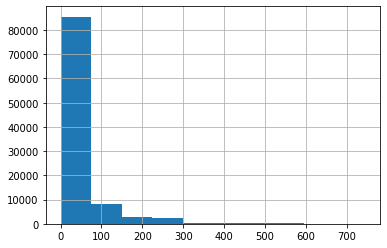

In [21]:
df.Fare.hist()

In [9]:
other_df.Relatives.describe()

count    100000.000000
mean          0.852250
std           1.412792
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          17.000000
Name: Relatives, dtype: float64

In [12]:
X = other_df.drop('Survived', axis=1)
y = other_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Simple classifier

In [13]:
clf_simple = KNeighborsClassifier()

In [14]:
start = time.time()
clf_simple.fit(X_train, y_train)
print('execution time:', time.time() - start)

execution time: 34.97430944442749


In [15]:
print('Train score:', clf_simple.score(X_train, y_train))
print('Test score:', clf_simple.score(X_test, y_test))
predicted = clf_simple.predict(X_test)
print('Precision:', precision_score(predicted, y_test))
print('Recall:', recall_score(predicted, y_test))

Train score: 0.8159125
Test score: 0.7392
Precision: 0.6859340403216408
Recall: 0.7001308433448317


Small classifier

In [14]:
clf_small = KNeighborsClassifier(2)
clf_small.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [15]:
print('Train score:', clf_small.score(X_train, y_train))
print('Test score:', clf_small.score(X_test, y_test))
predicted = clf_small.predict(X_test)
print('Precision:', precision_score(predicted, y_test))
print('Recall:', recall_score(predicted, y_test))

Train score: 0.843525
Test score: 0.6924
Precision: 0.45728936021442723
Recall: 0.7241188411145968


Dependency on n_neighbours parameter

In [20]:
acc_train, acc_test = [], []
N = 100
for n_neighbors in range(1, N, 3):
    start = time.time()
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    acc_train.append(clf.score(X_train, y_train))
    acc_test.append(clf.score(X_test, y_test))
    print(f'n_neighbors: {n_neighbors}    time: {time.time() - start}')
    break

n_neighbors: 1    time: 56.491872787475586


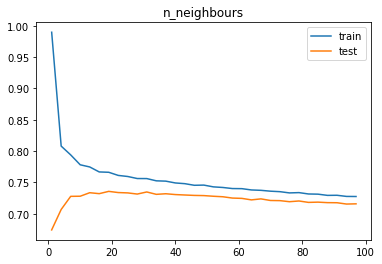

In [25]:
plt.plot(range(1, N, 3), acc_train)
plt.plot(range(1, N, 3), acc_test)
plt.title('n_neighbours')
plt.legend(['train', 'test'])
plt.show()

Dependency on p parameter

In [26]:
acc_train, acc_test = [], []
p_list = range(1, 11)
for p in p_list:
    start = time.time()
    clf = KNeighborsClassifier(p=p)
    clf.fit(X_train, y_train)
    acc_train.append(clf.score(X_train, y_train))
    acc_test.append(clf.score(X_test, y_test))
    print(f'p: {p}    time: {time.time() - start}')

p: 1    time: 19.985970497131348
p: 2    time: 18.145374298095703
p: 3    time: 20.902438402175903
p: 4    time: 20.903608322143555
p: 5    time: 20.85737133026123
p: 6    time: 20.839178800582886
p: 7    time: 20.8715558052063
p: 8    time: 20.865839958190918
p: 9    time: 20.88315224647522
p: 10    time: 20.861618041992188


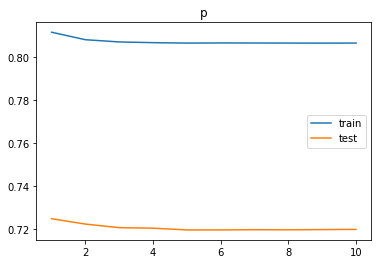

In [27]:
plt.plot(p_list, acc_train)
plt.plot(p_list, acc_test)
plt.title('p')
plt.legend(['train', 'test'])
plt.show()

----------------------

Best params

In [28]:
clf_best = GridSearchCV(KNeighborsClassifier(),
                       [{
                           'n_neighbors': range(10, 50, 5),
                           'weights': ['uniform']
                       },
                       {
                           'n_neighbors': range(10, 50, 5),
                           'metric': ['chebyshev']
                       },
                       {
                           'n_neighbors': range(10, 50, 5),
                           'p': [1, 2, 3],
                           'metric': ['minkowski']
                       }]
                       )

In [29]:
start = time.time()
clf_best.fit(X_train, y_train)
print(time.time() - start)

815.386474609375


In [30]:
print('Train score:', clf_best.score(X_train, y_train))
print('Test score:', clf_best.score(X_test, y_test))
predicted = clf_best.predict(X_test)
print('Precision:', precision_score(predicted, y_test))
print('Recall:', recall_score(predicted, y_test))

Train score: 0.7630375
Test score: 0.7443
Precision: 0.6591306374548421
Recall: 0.7209687699171446


In [31]:
clf_best.best_estimator_

KNeighborsClassifier(n_neighbors=35, p=1)

In [16]:
some_clf = KNeighborsClassifier(n_neighbors=25, p=1)

In [17]:
start = time.time()
some_clf.fit(X_train, y_train)
print(time.time() - start)

31.309176206588745


In [18]:
print('Train score:', some_clf.score(X_train, y_train))
print('Test score:', some_clf.score(X_test, y_test))
predicted = some_clf.predict(X_test)
print('Precision:', precision_score(predicted, y_test))
print('Recall:', recall_score(predicted, y_test))

Train score: 0.780875
Test score: 0.75865
Precision: 0.7178650506933923
Recall: 0.719122110670091
